In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import requests
import matplotlib.pyplot as plt
import re
from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import LancasterStemmer
from textblob import TextBlob
from collections import Counter

In [2]:
file_path = r"C:\Users\jhkju\Documents\sentiment.csv"

# Step 1: Load the CSV file (tab-separated)
afinn_wl_df = pd.read_csv(file_path, sep='\t', header=0)  # header=0: 첫 줄이 열 이름

# Step 2: Check the column names
print("Columns in file:", afinn_wl_df.columns)

# If the column names are incorrect, rename them
if 'term' not in afinn_wl_df.columns or 'value' not in afinn_wl_df.columns:
    afinn_wl_df.columns = ['term', 'value']

# Verify the content
print(afinn_wl_df.head())

# Step 3: Extract the wordlist and value dictionary
af_wordlist = list(afinn_wl_df["term"])  # List of words
afinn_values = dict(zip(afinn_wl_df["term"], afinn_wl_df["value"]))  # Word-to-value mapping

Columns in file: Index(['abandon', '-2'], dtype='object')
         term  value
0   abandoned     -2
1    abandons     -2
2    abducted     -2
3   abduction     -2
4  abductions     -2


In [3]:
# Step 3: Combination function
def combination(text, af_wordlist, afinn_values):
    # Load the lexicons
    afinn = Afinn()
    analyzer = SentimentIntensityAnalyzer()

    # Define the weights for each lexicon
    weights = {'AFINN': 0.4, 'NLTK(VADER)': 0.6}

    def sentiment_score(text):
        # Tokenize the text
        tokenized_words = text.split()

        # Normalize words: remove punctuation and lowercase
        normalized_words = [
            re.sub(r'[^\w\s]', '', word).strip('�.,!?\'"').lower() for word in tokenized_words
        ]

        # Filter words that exist in the AFINN wordlist
        afinn_words = [word for word in normalized_words if word in af_wordlist]
        print("AFINN words:", afinn_words)

        # Calculate AFINN score
        if afinn_words:  # Only calculate if matched words exist
            afinn_score = sum(afinn_values[word] for word in afinn_words) / len(afinn_words)
        else:
            afinn_score = 0  # Default score if no words match

        # Calculate NLTK VADER score
        nltk_score = analyzer.polarity_scores(text)["compound"]

        # Weighted sentiment score
        score = (weights['AFINN'] * afinn_score +
                 weights['NLTK(VADER)'] * nltk_score)

        ans_dict = {"Score": score, "Afinn_Score": afinn_score, "NLKT(Vader Score)": nltk_score}
        return ans_dict

    return sentiment_score(text)["Score"]

In [4]:
file_path = r"C:\Users\jhkju\Documents\reddit_bitcoin3.csv"

df = pd.read_csv(file_path)

In [5]:
# Calculate sentiment scores for each title
comb_senti = []
comb_senti_score = []
for i in range(df.shape[0]):
    text = df.iloc[i]["title"]
    print(f"Processing: {text}")
    try:
        senti_comb = combination(text, af_wordlist, afinn_values)
    except Exception as e:
        print(f"Error processing text: {text}, Error: {e}")
        senti_comb = 0
    comb_senti_score.append(senti_comb)

# Assign sentiment categories
for s in comb_senti_score:
    if s > 0.1:
        comb_senti.append("Positive")
    elif s < -0.1:
        comb_senti.append("Negative")
    else:
        comb_senti.append("Neutral")

# Add the results to the dataframe
df["Lexicon(NLTK)"] = comb_senti
print(df)

Processing: So close to .09 but working to .1
AFINN words: []
Processing: I believed a long time ago 
AFINN words: []
Processing: 😅
AFINN words: []
Processing: You now need 10,000$ to buy only 0.1 BTC
AFINN words: []
Processing: JUST IN: Texas has filed a bill to officially establish a ‘Strategic Bitcoin Reserve’
AFINN words: []
Processing: Look at the Lows not the Highs
AFINN words: []
Processing: NEW: #Bitcoin holdings per country
AFINN words: []
Processing: 1200% Return Since This Prophet
AFINN words: []
Processing: Canadian bitcoiners, how do you feel about Canada owning 0?
AFINN words: []
Processing: Guys and gals I can't believe we are still so early
AFINN words: []
Processing: Is this our generations 19th century gold rush? 
AFINN words: []
Processing: I’m about to do either the smartest or dumbest thing in my life.
AFINN words: ['smartest']
Processing: Someone actually said to me that since Bitcoin is divisible into Sats, it's the same as inflation!
AFINN words: []
Processing: 

AFINN words: []
Processing: MEME
AFINN words: []
Processing: Its nice being a millionaire again.
AFINN words: ['nice']
Processing: Mena Conference News?
AFINN words: []
Processing: What Android wallet does support P2PKH with passphrase except "Mycelium"?
AFINN words: ['support']
Processing: Miner's importance and rewards are HEAVILY underestimated, if global adoption happens
AFINN words: ['importance', 'rewards', 'underestimated']
Processing: Blackrock's 1-2% allocation advice is great, but...
AFINN words: ['great']
Processing: After Microsoft voted “no” to Bitcoin yesterday, it’s worth looking back at their original reaction when Apple first launched the iPhone
AFINN words: ['no', 'worth', 'launched']
Processing: Zoom out and trust the process - www.storeofvalue.net
AFINN words: ['trust']
Processing: I feel bad if you sold today 🤣
AFINN words: ['bad']
Processing: Bitcoin, MiCA & CBDCs: Dorien Rookmaker, Fmr Member of the European Parliament, on Freedom and EU Overregulation. In this p

AFINN words: []
Processing: Help gaining access to my Bitcoin wallet on BitGo
AFINN words: ['help', 'gaining']
Processing: BTC Miners are buying bitcoin.
AFINN words: []
Processing: Microsoft Shareholders - Actual breakdown of measures and votes
AFINN words: []
Processing: BTC Prices on Jan 1st Over the Past Decade: What are we looking at for 2025?
AFINN words: []
Processing: I have a new hobby
AFINN words: []
Processing: Got a bitboox. Am I not supposed to create my own pass phrase?
AFINN words: []
Processing: Sonic the Hedgehog in the 90s & Bitcoin
AFINN words: []
Processing: Kind of regretting not getting born earlier.
AFINN words: ['kind', 'regretting']
Processing: Could the gov arms race push us to $1M and beyond?
AFINN words: []
Processing: Over 1 hour between blocks.
AFINN words: ['blocks']
Processing: Which one are you?
AFINN words: []
Processing: Determining the right narrative
AFINN words: []
Processing: Has anyone here retired on Bitcoin yet?
AFINN words: []
Processing: So I

AFINN words: []
Processing: Would you do this?
AFINN words: []
Processing: Early Bitcoin skeptics compilation
AFINN words: ['skeptics']
Processing: Is buying a ledger from Amazon safe?
AFINN words: ['safe']
Processing: Once you see it
AFINN words: []
Processing: Wait till the find out how much energy AI is using!
AFINN words: []
Processing: Is investing in BTC ETF over BTC in self-custody a good choice, if main factors are security and peace of mind?
AFINN words: ['good', 'peace']
Processing: True Maxi
AFINN words: ['true']
Processing: Satoshi on breaking SHA-256 
AFINN words: []
Processing: Is it more expensive to buy Bitcoin directly in the Tangum App?
AFINN words: []
Processing: Question about cold wallets 
AFINN words: []
Processing: You now need 1,000$ to buy only 0.01 BTC
AFINN words: []
Processing: Increasing the block size
AFINN words: ['block']
Processing: answers for the public quiz 
AFINN words: []
Processing: Microsoft shareholders are missing out
AFINN words: ['missing']
P

AFINN words: []
Processing: We are getting to very exciting times
AFINN words: ['exciting']
Processing: LMAOOO is this how we feel now? seriously how tf could MSFT not see the light? SMH
AFINN words: []
Processing: Bitten by the Bitcoin Bug – How Do I Get Over This FOMO and Start Making Smart Moves?
AFINN words: ['smart']
Processing: Those were the days
AFINN words: []
Processing: Bitcoin Issue
AFINN words: []
Processing: Today's sermon on the mount...
AFINN words: []
Processing: 🇮🇹 Italy to scale back tax hike on Bitcoin and 'crypto' capital gains, lawmakers say - Reuters
AFINN words: ['gains']
Processing: JUST IN: The Wall Street Journal telling its readers there will only ever be 21m Bitcoin
AFINN words: []
Processing: Just realized  something so simple, as to why BTC will be even more valuable
AFINN words: []
Processing: NEW IG for Bitcoin and stock investors: @fire_phd
AFINN words: []
Processing: Twitter founder and former CEO Jack Dorsey who is worth $5,7 Billion photographed in 

AFINN words: []
Processing: Hodling: The Hardest Part of the Journey
AFINN words: []
Processing: 19 years old. Completly new to bitcoin. Always awfully interested in investing in crypto/stocks. Need some help
AFINN words: ['interested', 'help']
Processing: Invest in bitcoin for your business
AFINN words: []
Processing: Jetking Infotrain becomes India's first public company to hold Bitcoin as treasury reserve
AFINN words: []
Processing: I missed the dip
AFINN words: ['missed']
Processing: Who owns Bitcoins? TOP 35 BTC holders. 
AFINN words: ['top']
Processing: Passphrase after importing seed from Ledger to Trezor
AFINN words: []
Processing: Buying crypto under 18
AFINN words: []
Processing: Mining Pools
AFINN words: []
Processing: BTC Capital Gains Tax Question - Need Professional Advice
AFINN words: ['gains']
Processing: Why Bitkey is Jack Dorsey’s next big move... interesting pod
AFINN words: ['big', 'interesting']
Processing: Question regarding Bitcoin as a Christmas stocking stuffer

AFINN words: ['like']
Processing: Cold wallet
AFINN words: []
Processing: While some panic sell on 9 Dec, Bitcoin ETFs added another net $479.1m, bringing the total to $33.888b
AFINN words: ['panic']
Processing: Lost Bitcoins? Help Me!
AFINN words: ['lost', 'help']
Processing: If you havent already, take some profits and buy some Christmas presents for family.
AFINN words: []
Processing: Calling all Treasure Hunters
AFINN words: ['treasure']
Processing: Interessting interview: Convertible Bond Expert Breaks Down Why MicroStrategy Is Soaring | Richard Byworth 
AFINN words: []
Processing: Little meme I thought of randomly
AFINN words: []
Processing: The Biggest Bitcoin Move in History – Are You Ready?
AFINN words: []
Processing: Coinbase?
AFINN words: []
Processing: GOLD VS BITCOIN Investment In 2009
AFINN words: []
Processing: Google Willow Quantum vs Bitcoin Encryption
AFINN words: []
Processing: Max Keiser: Bitcoin FOMO has reached Nation State level 🚀
AFINN words: ['reached']
Process

AFINN words: []
Processing: PSA: If you own ETF shares, you don't own bitcoin.
AFINN words: ['shares']
Processing: Daily Discussion, December 10, 2024
AFINN words: []
Processing: Bitcoin Holding…
AFINN words: []
Processing: He said what?
AFINN words: []
Processing: Setting up a full bitcoin node (How)
AFINN words: []
Processing: $1,000,000 per Bitcoin When? 🟠⚡
AFINN words: []
Processing: How does the Bitcoin market react if the UAPs are revealed to be NHI?
AFINN words: []
Processing: Your kids are gonna love it
AFINN words: ['love']
Processing: JUST IN: 🇷🇺 Russian State Duma Deputy Anton Tkachev proposes creation of a Bitcoin strategic reserve in Russia.
AFINN words: []
Processing: Bitcoin Adoption 
AFINN words: []
Processing: central bank vs. world's population
AFINN words: []
Processing: Can I Generate A Blockchain.com wallet.aes.json File With Only My Wallet ID?
AFINN words: []
Processing: MSTR purchases another 21.5k bitcoin for $2.1bn
AFINN words: []
Processing: The dream is comin

AFINN words: ['safety']
Processing: Is it too late to start investing in Bitcoin at 21?
AFINN words: []
Processing: Imagine if they woulda put Bitcoin in a better light when this movie came out in 2015 and not link it with drugs. How much more adoption we will have. It's one of the earliest movies I remember that talked about Bitcoin 
AFINN words: ['better']
Processing: Bitcoin song, yall heard this yet? 
AFINN words: []
Processing: fresh off the press
AFINN words: ['fresh']
Processing: Wallet or Stock Trading Platform (eToro)
AFINN words: []
Processing: Weiner guy accepts Bitcoin, has his own “weinerverse”
AFINN words: ['accepts']
Processing: Have I lost access forever?
AFINN words: ['lost']
Processing: Coinbase “buying algorithm “
AFINN words: []
Processing: The peaceful revolution 
AFINN words: ['peaceful']
Processing: I'm new, would this outlet work for mining?
AFINN words: []
Processing: If somebody is looking for a great Christmas present 
AFINN words: ['great']
Processing: Coffe

AFINN words: []
Processing: Me. 
AFINN words: []
Processing: Justcoin 
AFINN words: []
Processing: Moving to a crypto friendly country
AFINN words: ['friendly']
Processing: Paranoid security protocols with beginner status 
AFINN words: []
Processing: A few months ago, we explored the idea of merging EVERY Bitcoin metric into one all-encompassing indicator... The results were unbelievable! Check it out! 
AFINN words: ['unbelievable']
Processing: Bitcoin for My Kids
AFINN words: []
Processing: How Bitcoin Makes Humanity Excellent Again
AFINN words: ['excellent']
Processing: Bitcoin buying strategy - please review and critique 
AFINN words: ['please']
Processing: I’m selling
AFINN words: []
Processing: BREAKING: AMAZON shareholders are asking the board to look into adding BTC to their treasury !!!
AFINN words: []
Processing: Buying daily stuff w/ Bitcoin is going much more mainstream in 2025!
AFINN words: []
Processing: Michael Saylor interview with Dave Portnoy 
AFINN words: []
Processin

AFINN words: ['gift']
Processing: Why we don't talk about technical stuff?
AFINN words: []
Processing: An approximation visual. You are EARLY to something incredible that can't be stopped. #Bitcoin
AFINN words: ['stopped']
Processing: What’s the name of this app?
AFINN words: []
Processing: Chat rooms that use to earn you bitcoins 
AFINN words: []
Processing: Bitcoin vs Stocks
AFINN words: []
Processing: Receiving salaries in Bitcoin and storing of value? Where are the solutions to the below problems then?
AFINN words: ['solutions', 'problems']
Processing: My new 100K BTC celebration T-shirt 
AFINN words: []
Processing: 16 word phrase I save back in 2014z 
AFINN words: ['save']
Processing: We need more Green
AFINN words: []
Processing: Is there any calculator to measure how much you would have if you DCAd for certain amount of time backwards? 
AFINN words: ['certain']
Processing: It’s going up forever Laura video from three years ago.  Leaving here for posterity.  F*ing legend.  
AFINN

AFINN words: []
Processing: What do you think about this?
AFINN words: []
Processing: The Bitcoin lock day 
AFINN words: []
Processing: Bitcoin rat at the NY Fed the night BTC hits $100000
AFINN words: []
Processing: Czech Republic Introduces Tax-Free Rules for Long-Term Bitcoin Holders
AFINN words: []
Processing: Buy BTC without commissions
AFINN words: []
Processing: Long Term Loan To Secure Bitcoin?
AFINN words: ['secure']
Processing: Nice try dipshit. Stay safe out there fellas.
AFINN words: ['nice', 'dipshit', 'safe']
Processing: How does mining Bitcoin work (in simple terms)
AFINN words: []
Processing: Automatic monthly bitcoin purchases to my own wallet?
AFINN words: []
Processing: Bitcoin to balance sheet
AFINN words: []
Processing: Why does Coinbase say that KYC law requires them to "periodically confirm personal info"?
AFINN words: []
Processing: The Future of Bitcoin: One Dollar User and a Billion Bitcoin Holders 🚀"
AFINN words: []
Processing: Ok worst case scenario; u die t

AFINN words: []
Processing: URGENT travel question 
AFINN words: ['urgent']
Processing: I wish I had spent the past 10 years investing in BTC instead of 401K
AFINN words: ['wish']
Processing: Is this money in my wallet?
AFINN words: []
Processing: US Treasury Labels Bitcoin as "Digital Gold" in Latest Report
AFINN words: []
Processing: US treasury just dubbed Bitcoin as ‘digital gold’
AFINN words: []
Processing: Been really thinking about BTC
AFINN words: []
Processing: Is there any point in updating to a new cold wallet?
AFINN words: []
Processing: Bitcoin Stock Exchange
AFINN words: []
Processing: (wallet.dat parser) Can anyone verify if this runs server or client side?
AFINN words: []
Processing: MPC vs Seed
AFINN words: []
Processing: Focus on the properties of money, not the price.
AFINN words: []
Processing: Stateless HW wallets 
AFINN words: []
Processing: I think I might have bitcoin. Any ideas of how to check?
AFINN words: []
Processing: Is it too late?
AFINN words: []
Process

AFINN words: []
Processing: The latest Bitcoin Breakdown newsletter issue is now live. See a sneak peek of the Quick Bits and Quick Media sections below. Full issue link is in the comments.
AFINN words: []
Processing: 🤔🤔🤔🤔
AFINN words: []
Processing: Need support 
AFINN words: ['support']
Processing: How is tangem wallet?
AFINN words: []
Processing: Best bitcoin wallet
AFINN words: ['best']
Processing: Where should I buy my crypto?
AFINN words: []
Processing: How’s It Looking, Bitcoin Fam
AFINN words: []
Processing: Revenge of the Bitcoin Bros 
AFINN words: ['revenge']
Processing: Uniting Two Transactions
AFINN words: []
Processing: Bitcoin: The Friend Who Actually Pays You Back
AFINN words: []
Processing: Where were you $100,000 ago?
AFINN words: []
Processing: Most Heat Resistance?
AFINN words: []
Processing: Hi I’m new to learning about crypto and stocks.  I have cash app. I recently been adding a few bucks to my stocks. And my rounds ups go to bitcoin.  What’s your advice on starti

AFINN words: ['forget']
Processing: JUST IN: Bitcoin SURGES back over $100,000
AFINN words: []
Processing: Own about half a coin and still feel behind
AFINN words: []
Processing:  Bitcoin Mechanic: Is Bitcoin Too Centralized? Freedom Money vs. State-Surveilled Store of Value 
AFINN words: ['freedom']
Processing: Adoption Curve: YOU ARE HERE
AFINN words: []
Processing: The Rise of Digital City-States: The New Frontier of Civilization
AFINN words: []
Processing: My new mug
AFINN words: []
Processing: Unlocking Bitcoin’s Power
AFINN words: []
Processing: Strike Bill Pay
AFINN words: ['strike', 'pay']
Processing: Everyone that says they will "never sell" why?
AFINN words: []
Processing: There has got to be a way to ban ‘Should I buy BTC now’ posts…
AFINN words: ['ban']
Processing: Shoutout to the legacy media for gaslighting and driving Normie FOMO
AFINN words: []
Processing: Perception is everything 
AFINN words: []
Processing: What is the best way to buy/sell anonymously? 
AFINN words: [

AFINN words: ['top']
Processing: Transfer PayPal exchange to Trezor 3
AFINN words: []
Processing: German Newsletter 
AFINN words: []
Processing: Not tech literate 
AFINN words: []
Processing: Blockchain.com has basically stolen my money...
AFINN words: ['stolen']
Processing: "I will be buying a billion dollars of Bitcoin a day at $1,000,000 per coin." -Michael Saylor
AFINN words: []
Processing: Made a post yesterday - Now I have a question! 
AFINN words: []
Processing: The 100k Rollercoaster
AFINN words: []
Processing: 🇸🇻 El Salvador Bonds Rally as Bitcoin Jumps Past $100,000 Mark. President Bukele put El Salvador on the path to prosperity.
AFINN words: []
Processing: Complete noob to bitcoin
AFINN words: ['noob']
Processing: The Bitcoin $100 and Bitcoin $100K side by side video is insane
AFINN words: ['insane']
Processing: How to stop a $5 wrench attack if you become a target of sorts? Has anyone put some sort of protocol in place I.e multi sig? 
AFINN words: ['stop', 'attack']
Proces

AFINN words: ['hope', 'better']
Processing: The tale of 24 hours... 
AFINN words: []
Processing: What is the actual weight of the bitcoin blockchain?
AFINN words: []
Processing: Is bitcoin private?
AFINN words: []
Processing: Living on a Bitcoin Standard - Fold vs. Strike
AFINN words: ['strike']
Processing: Anyone try getting “paid” in Bitcoin?
AFINN words: []
Processing: And again and again and again...
AFINN words: []
Processing: Jumping on the rocket ship
AFINN words: []
Processing: Keeping it Cool: Mining Bitcoin in Space
AFINN words: ['cool']
Processing: How Starting Small with Bitcoin Helped Me Build Confidence
AFINN words: ['confidence']
Processing: Bitcoin Recap to 100K!
AFINN words: []
Processing: For those who feel behind. Quickest way to gain significant exposure to bitcoin is through your 401k.
AFINN words: ['gain', 'significant']
Processing: Study Bitcoin.
AFINN words: []
Processing: They're doing this for us
AFINN words: []
Processing: Average Cost Not Accurate in Coinbas

AFINN words: []
Processing: I want to get into Bitcoin but don’t know where to start
AFINN words: ['want']
Processing: “People who use fiat currency as a store of value? We call them poor.” - Michael Saylor
AFINN words: ['poor']
Processing: What is the best way to gift bitcoin for Christmas?
AFINN words: ['best', 'gift']
Processing: Bitcoin is a benevolent financial hyper-predator.
AFINN words: []
Processing: Bitcoin.com “wallet keys not found.”
AFINN words: []
Processing: Normies coming to invest in Bitcoin after reading about 100k in the news
AFINN words: []
Processing: Bought bitcoin for the first time. 
AFINN words: []
Processing: Sell coins to troll
AFINN words: []
Processing: Wait Time?
AFINN words: []
Processing: Legacy Wallets on Blockchain.into
AFINN words: []
Processing: Bitcoin Retirement Plan
AFINN words: []
Processing: Buttcoiner sub right now
AFINN words: []
Processing: It was inevitable 
AFINN words: []
Processing: Bitcoin after hitting 120k
AFINN words: []
Processing: G

AFINN words: []
Processing: For old times sake
AFINN words: []
Processing: Would it be safe to say...
AFINN words: ['safe']
Processing: Wallstreet still made more money from bitcoin than you. 
AFINN words: []
Processing: Noone can stop Bitcoin, is unpredictable
AFINN words: ['stop']
Processing: There are 0.0024 BTC per person.
AFINN words: []
Processing: Just wanted to say how meaningful Bitcoin hitting 100k was to me.
AFINN words: ['meaningful']
Processing: What was 18yr old me thinking? 
AFINN words: []
Processing: 🇺🇸 US President-elect just posted "CONGRATULATIONS BITCOINERS!!! $100,000!!!"
AFINN words: ['congratulations']
Processing: Bears watching Bitcoin hit 100k
AFINN words: []
Processing: Please don't gloat today.
AFINN words: ['please']
Processing: This week in Bitcoin, wrapped into 4 minutes.
AFINN words: []
Processing: Etf or coin
AFINN words: []
Processing: Bitcoin: A Decentralized Solution to Centralized Problems - Lyn Alden
AFINN words: ['solution', 'problems']
Processing

AFINN words: ['loved']
Processing: Lost bitcoin
AFINN words: ['lost']
Processing: Oh NOOO!
AFINN words: []
Processing: Refractory Period 
AFINN words: []
Processing: Finally! With Strike now we can pay all our bills using Bitcoin in the US without having a bank account.
AFINN words: ['strike', 'pay']
Processing: Banking Veteran Caitlin Long shares why she is all in on Bitcoin
AFINN words: ['shares']
Processing: Today, El Salvador sits on $326,000,000 profit on its Bitcoin investment 🔥🥳🎉
AFINN words: []
Processing: 13 days ago, I predicted yesterday's Darth Maul candle, and got downvoted for it. All the leveraged longs who got liquidated had it coming.
AFINN words: []
Processing: Selling Bitcoin and buying again
AFINN words: []
Processing: Just another day for us 🦘
AFINN words: []
Processing: What’s a good hardware wallet nowadays ?
AFINN words: ['good']
Processing: I made a song for the Bitcoin!

AFINN words: []
Processing: What exchange has given you the fewest problems?
AFINN words: 

In [6]:
df["Lexicon(NLTK)"] = comb_senti
file_path = r"C:\Users\jhkju\Documents\reddit_bitcoin_senti.csv"
df.to_csv(file_path)
df

,author,source,title,url,date,Lexicon(NLTK)
0,Spiritwolf7000,Reddit,So close to .09 but working to .1,https://i.redd.it/jkbwwb4j6i6e1.jpeg,5 hr. ago,Neutral
1,Nadiveamerican000,Reddit,I believed a long time ago,https://i.redd.it/vxn5q237di6e1.jpeg,4 hr. ago,Neutral
2,Niwde101,Reddit,😅,https://i.redd.it/ix4vh83gvi6e1.jpeg,3 hr. ago,Neutral
3,neda6117,Reddit,"You now need 10,000$ to buy only 0.1 BTC",https://www.reddit.com/r/Bitcoin/comments/1hco...,12 hr. ago,Neutral
4,hex_peson,Reddit,JUST IN: Texas has filed a bill to officially ...,https://i.redd.it/ls1ioyzm1g6e1.png,12 hr. ago,Neutral
...,...,...,...,...,...,...
1974,Any_Prune4127,Reddit,What should i do,https://www.reddit.com/r/Bitcoin/comments/1h80...,7 days ago,Neutral
1975,Alert-Author-7554,Reddit,100k IS FALLING,https://i.redd.it/n2v3lzr6qw4e1.jpeg,8 days ago,Negative
1976,big-in-jap,Reddit,the bull run prophecy,https://i.redd.it/l4n8ltvzv45e1.jpeg,7 days ago,Neutral
1977,Satrapes1,Reddit,On to the next big 100K,https://i.redd.it/trdtv2t8qz4e1.jpeg,8 days ago,Positive


In [7]:
df = pd.read_csv(file_path)

<Axes: ylabel='Sentiment(%)'>

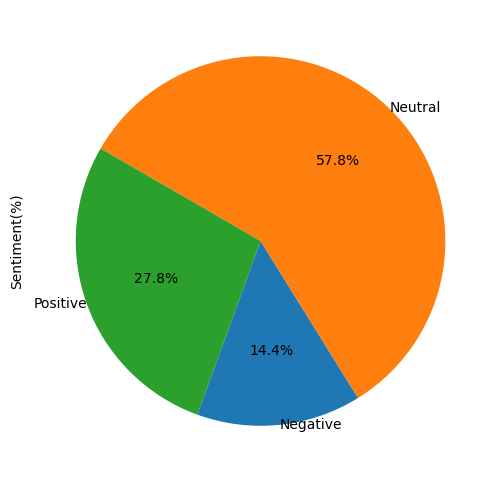

In [8]:
#Pie-Chart
sentis = df.groupby(['Lexicon(NLTK)']).size()
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentis.plot.pie(ax=ax, autopct='%1.1f%%', startangle=250, fontsize=10, labeldistance = 1, label="Sentiment(%)")

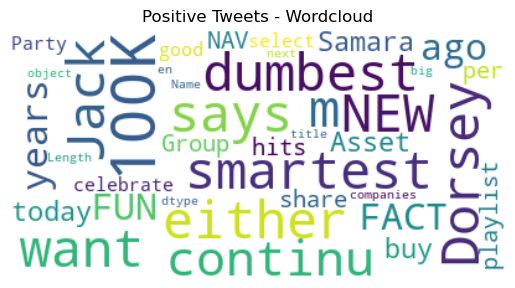

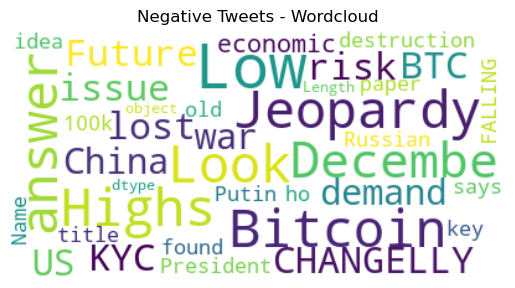

In [9]:
#Word Cloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = df['title'][df["Lexicon(NLTK)"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print("===============================================================================")
# Wordcloud with negative tweets
negative_tweets = df['title'][df["Lexicon(NLTK)"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
#Max term Used
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]


tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt', 'via', '...']
tf = Counter()

# Loop through each row of the DataFrame and process the tweet text
for i, row in df.iterrows():
    tokens = process(text=row['Text'], tokenizer=tweet_tokenizer, stopwords=stopword_list)
    tf.update(tokens)

# Print the most common terms and plot the results
x_labels = []
for tag, count in tf.most_common(50):
    print("{}: {}".format(tag, count))
    x_labels.append(tag)
    
y = [count for tag, count in tf.most_common(50)]
fig = plt.figure(figsize=(8, 12))
x = x_labels
plt.barh(x, y)
plt.title("Sentiment")
plt.ylabel("Frequency")
#plt.savefig('Sentiment')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\jhkju/nltk_data'
    - 'C:\\apps\\Anaconda\\nltk_data'
    - 'C:\\apps\\Anaconda\\share\\nltk_data'
    - 'C:\\apps\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\jhkju\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
